<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task1/blob/main/DL_BERT_beto_task1_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="blue"><h1>**DEEP LEARNING**</h1></font>


---
BERT es un modelo de lenguaje basado en transformers que utiliza una arquitectura de red neuronal llamada Transformer para aprender representaciones de palabras y oraciones en un corpus de texto.

Teniendo en cuenta la estructura y volumen de los datos se proponen diversos enfoques :


1.   Aplicar **Dropout** y **early stopping** para evitar la situación de **overfitting**.
2.   Traducir al idioma Español la parte del conjunto de datos con sentencias en Inglés.

In [36]:
# Cargar las librerias y recursos necesarios.

import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [37]:
from sklearn.utils import shuffle
# Cargar datos preprocesados
#train_data = pd.read_csv('/content/df_train_en_to_es.csv', delimiter='\t', encoding='latin1')
#test_data = pd.read_csv('/content/df_test_en_to_es.csv', delimiter='\t', encoding='latin1')

test_data = pd.read_csv('/content/data_test_es.tsv', sep='\t')
train_data = pd.read_csv('/content/data_train_es.tsv', sep='\t')
# Mezclar los datos de entrenamiento
shuffled_train_data = shuffle(train_data, random_state=42)

# Mezclar los datos de prueba
shuffled_test_data = shuffle(test_data, random_state=42)

In [38]:
test_data.head(10)

,test_case,id,source,language,task1,task2,text
0,EXIST2021,9186,gab,es,sexist,misogyny-non-sexual-violence,y te golpeo mas fuerte perra
1,EXIST2021,9187,twitter,es,non-sexist,non-sexist,user user castigado tres meses sin salir y la ...
2,EXIST2021,9188,twitter,es,sexist,stereotyping-dominance,user jaja el me he topado con tantos de la ond...
3,EXIST2021,9189,twitter,es,non-sexist,non-sexist,resulta que hoy es el dia de la juventud y no ...
4,EXIST2021,9190,twitter,es,sexist,ideological-inequality,user los que dicen que cren en la igualdad per...
5,EXIST2021,9191,gab,es,non-sexist,non-sexist,ahora que sanchez se halla en canada parece qu...
6,EXIST2021,9192,twitter,es,non-sexist,non-sexist,gracias por compartir abriste heridas que uno ...
7,EXIST2021,9193,twitter,es,sexist,objectification,por dios como no podes querer a mis gatas conc...
8,EXIST2021,9194,twitter,es,non-sexist,non-sexist,user user viceversa de nada que te repito que ...
9,EXIST2021,9195,twitter,es,non-sexist,non-sexist,una de las flores mas representativas del amor...


In [6]:
shuffled_train_data.head(10)

,test_case,id,source,language,task1,task2,texto
5286,EXIST2021,5287,twitter,es,sexist,stereotyping-dominance,user user no es que no de ni una es que e...
6018,EXIST2021,6019,twitter,es,non-sexist,non-sexist,user user user si los tiene locos a ellos y...
2981,EXIST2021,2982,twitter,es,non-sexist,non-sexist,usuario me recogieron en algún lugar hace años...
3347,EXIST2021,3348,twitter,es,sexist,sexual-violence,"usuario, mi deseo navideño es que tomes mi pol..."
469,EXIST2021,470,twitter,es,sexist,stereotyping-dominance,entre las conversaciones que fusionan la domes...
538,EXIST2021,539,twitter,es,non-sexist,non-sexist,usuario dejarás de ser un idiota por un día mi...
3176,EXIST2021,3177,twitter,es,non-sexist,non-sexist,"en cualquier momento dado, la igualdad perfect..."
6127,EXIST2021,6128,twitter,es,sexist,misogyny-non-sexual-violence,user esa parte es la mejor poner en su lugar a...
1047,EXIST2021,1048,twitter,es,sexist,sexual-violence,usuario usuario imagine a una mujer siendo dom...
1330,EXIST2021,1331,twitter,es,sexist,ideological-inequality,las usuarias que tienen un pie en el cristiani...


<font color="brown"><h1>**Preprocesamiento**</h1></font>



In [39]:
# Convertir a minúsculas

shuffled_train_data.texto = shuffled_train_data.texto.str.lower()
shuffled_train_data.head(10)
shuffled_test_data.text = shuffled_test_data.text.str.lower()
shuffled_test_data.head(10)

,test_case,id,source,language,task1,task2,text
1374,EXIST2021,10560,twitter,es,non-sexist,non-sexist,pedis aumento mena corre todas hijo de puta re...
2293,EXIST2021,7111,twitter,es,sexist,misogyny-non-sexual-violence,"el usuario no vuelva a enviarme un mensaje, ma..."
3379,EXIST2021,8197,gab,es,sexist,ideological-inequality,el juez kavanaugh es un satanista secreto que ...
1090,EXIST2021,10276,twitter,es,non-sexist,non-sexist,cada dia me pone mas triste lo que son los hom...
1803,EXIST2021,10989,gab,es,sexist,ideological-inequality,no es responsable que influencers esten alimen...
2694,EXIST2021,7512,twitter,es,sexist,ideological-inequality,usuario usuario usuario usuario usuario usuari...
461,EXIST2021,9647,twitter,es,sexist,ideological-inequality,pregunto antes era unidos podemos ahora unidas...
3346,EXIST2021,8164,twitter,es,sexist,ideological-inequality,"usuario usuario usuario usuario bueno, una ide..."
2297,EXIST2021,7115,twitter,es,non-sexist,non-sexist,en la última clase que tuvimos sobre justicia ...
2873,EXIST2021,7691,twitter,es,sexist,sexual-violence,"chicos, si tienen videos de ustedes follando c..."


In [40]:
# Eliminar url/website que no usan http, solo utilizan .com websites
# Palabras separadas por a . no son eliminadas
import re
shuffled_train_data.texto = shuffled_train_data.texto.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_train_data.head(10)
shuffled_test_data.text = shuffled_test_data.text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_test_data.head(10)

,test_case,id,source,language,task1,task2,text
1374,EXIST2021,10560,twitter,es,non-sexist,non-sexist,pedis aumento mena corre todas hijo de puta re...
2293,EXIST2021,7111,twitter,es,sexist,misogyny-non-sexual-violence,"el usuario no vuelva a enviarme un mensaje, ma..."
3379,EXIST2021,8197,gab,es,sexist,ideological-inequality,el juez kavanaugh es un satanista secreto que ...
1090,EXIST2021,10276,twitter,es,non-sexist,non-sexist,cada dia me pone mas triste lo que son los hom...
1803,EXIST2021,10989,gab,es,sexist,ideological-inequality,no es responsable que influencers esten alimen...
2694,EXIST2021,7512,twitter,es,sexist,ideological-inequality,usuario usuario usuario usuario usuario usuari...
461,EXIST2021,9647,twitter,es,sexist,ideological-inequality,pregunto antes era unidos podemos ahora unidas...
3346,EXIST2021,8164,twitter,es,sexist,ideological-inequality,"usuario usuario usuario usuario bueno, una ide..."
2297,EXIST2021,7115,twitter,es,non-sexist,non-sexist,en la última clase que tuvimos sobre justicia ...
2873,EXIST2021,7691,twitter,es,sexist,sexual-violence,"chicos, si tienen videos de ustedes follando c..."


In [41]:
# Eliminar &text; etiquetas html

shuffled_train_data.texto = shuffled_train_data.texto.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_train_data.head()
shuffled_test_data.text = shuffled_test_data.text.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_test_data.head()

,test_case,id,source,language,task1,task2,text
1374,EXIST2021,10560,twitter,es,non-sexist,non-sexist,pedis aumento mena corre todas hijo de puta re...
2293,EXIST2021,7111,twitter,es,sexist,misogyny-non-sexual-violence,"el usuario no vuelva a enviarme un mensaje, ma..."
3379,EXIST2021,8197,gab,es,sexist,ideological-inequality,el juez kavanaugh es un satanista secreto que ...
1090,EXIST2021,10276,twitter,es,non-sexist,non-sexist,cada dia me pone mas triste lo que son los hom...
1803,EXIST2021,10989,gab,es,sexist,ideological-inequality,no es responsable que influencers esten alimen...


In [42]:
# Eliminar caráctres especiales, #:)(/\='] usados en emojis y hashtags
shuffled_train_data.texto = shuffled_train_data.texto.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_train_data.head(10)
shuffled_test_data.text = shuffled_test_data.text.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_test_data.head(10)

<ipython-input-42-e2397799f2a3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_train_data.texto = shuffled_train_data.texto.str.replace("[^a-zA-ZñÑ#]", " ")
<ipython-input-42-e2397799f2a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_test_data.text = shuffled_test_data.text.str.replace("[^a-zA-ZñÑ#]", " ")


,test_case,id,source,language,task1,task2,text
1374,EXIST2021,10560,twitter,es,non-sexist,non-sexist,pedis aumento mena corre todas hijo de puta re...
2293,EXIST2021,7111,twitter,es,sexist,misogyny-non-sexual-violence,el usuario no vuelva a enviarme un mensaje ma...
3379,EXIST2021,8197,gab,es,sexist,ideological-inequality,el juez kavanaugh es un satanista secreto que ...
1090,EXIST2021,10276,twitter,es,non-sexist,non-sexist,cada dia me pone mas triste lo que son los hom...
1803,EXIST2021,10989,gab,es,sexist,ideological-inequality,no es responsable que influencers esten alimen...
2694,EXIST2021,7512,twitter,es,sexist,ideological-inequality,usuario usuario usuario usuario usuario usuari...
461,EXIST2021,9647,twitter,es,sexist,ideological-inequality,pregunto antes era unidos podemos ahora unidas...
3346,EXIST2021,8164,twitter,es,sexist,ideological-inequality,usuario usuario usuario usuario bueno una ide...
2297,EXIST2021,7115,twitter,es,non-sexist,non-sexist,en la ltima clase que tuvimos sobre justicia ...
2873,EXIST2021,7691,twitter,es,sexist,sexual-violence,chicos si tienen videos de ustedes follando c...


In [ ]:
import pandas as pd

# Suponiendo que ya tienes cargado el DataFrame en la variable "df"
# Por ejemplo, si tienes el DataFrame "test_data" que mencionaste antes:
# test_data = pd.read_csv('/content/df_test_en_to_es.csv', sep='\t')

# Obtener la longitud del DataFrame (número de filas)
longitud = shuffled_test_data.shape[0]

# Mostrar la longitud
print("La longitud del DataFrame es:", longitud)


La longitud del DataFrame es: 2208


<font color="brown"><h1>**Longitud máxima por sentencia**</h1></font>

Valor relacionado con los recursos de máquina.

In [43]:
MAX_LEN=255

In [ ]:
import numpy as np

shuffled_test_data['text'] = shuffled_test_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lens = []

for txt in shuffled_test_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=5000, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(max_len)

755


In [ ]:
import numpy as np

shuffled_train_data['text'] = shuffled_train_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lenss = []

for txt in shuffled_train_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=500, truncation=True)
    token_lenss.append(len(tokens))

max_len=np.max(token_lenss)
print(max_len)

134


In [ ]:
shuffled_train_data.head(10)

,test_case,id,source,language,task1,task2,texto
5286,EXIST2021,5287,twitter,es,sexist,stereotyping-dominance,user user no es que no de ni una es que e...
6018,EXIST2021,6019,twitter,es,non-sexist,non-sexist,user user user si los tiene locos a ellos y...
2981,EXIST2021,2982,twitter,es,non-sexist,non-sexist,usuario me recogieron en alg n lugar hace años...
3347,EXIST2021,3348,twitter,es,sexist,sexual-violence,usuario mi deseo navideño es que tomes mi pol...
469,EXIST2021,470,twitter,es,sexist,stereotyping-dominance,entre las conversaciones que fusionan la domes...
538,EXIST2021,539,twitter,es,non-sexist,non-sexist,usuario dejar s de ser un idiota por un d a mi...
3176,EXIST2021,3177,twitter,es,non-sexist,non-sexist,en cualquier momento dado la igualdad perfect...
6127,EXIST2021,6128,twitter,es,sexist,misogyny-non-sexual-violence,user esa parte es la mejor poner en su lugar a...
1047,EXIST2021,1048,twitter,es,sexist,sexual-violence,usuario usuario imagine a una mujer siendo dom...
1330,EXIST2021,1331,twitter,es,sexist,ideological-inequality,las usuarias que tienen un pie en el cristiani...


In [44]:
X = shuffled_train_data['texto'].values
y = shuffled_train_data['task1'].values
Z = shuffled_test_data['text'].values
z = shuffled_test_data['task1'].values

In [45]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task1, val_task1 = train_test_split(X, y, test_size=0.2, random_state=42)

<font color="brown"><h1>**Carga de los recursos del algoritmo BERT**</h1></font>


---


Se utiliza el modelo BETO, para el idioma Español.

1.   Tokenizador.
2.   Modelo pre-entrenado.

In [46]:
import numpy as np

# Cargar el tokenizador de BETO para español
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

# Cargar el modelo BETO pre-entrenado para clasificación de secuencia
model = TFBertForSequenceClassification.from_pretrained('dccuchile/bert-base-spanish-wwm-cased', num_labels=2)


# Cargar el tokenizador de BETO para español
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

# Función para tokenizar usando el tokenizador BETO
def tokenize_beto(data, max_len=MAX_LEN):
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)



All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



<font color="brown"><h1>**Codificación**</h1></font>
Codificación en representaciones one-hot de la clase utilizando OneHotEncoder y se obtiene las matrices densas.

In [47]:
#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(train_task1).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(val_task1).reshape(-1, 1)).toarray()
z_test = ohe.fit_transform(np.array(z).reshape(-1, 1)).toarray()

<font color="brown"><h1>**Obtención de los datos**</h1></font>
Para una estructura BERT es necesario obtener :


1.   Tokenizado del conjunto de datos : train, test y val.
2.   Obtención de la máscara de atención para cada conjunto de datos.



In [49]:
# Tokenizar los conjuntos de datos usando el tokenizador BETO
train_input_ids, train_attention_masks = tokenize_beto(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_beto(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_beto(Z, MAX_LEN)

<font color="brown"><h1>**Estructura de los datos**</h1></font>

In [50]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)

(5581, 255)
(1396, 255)
(4368, 255)


<font color="brown"><h1>**Configuración del modelo**</h1></font>

In [51]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

def create_model(max_len=MAX_LEN):
    # Cargar el tokenizador BETO para español
    tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

    # Cargar el modelo BETO preentrenado para clasificación de secuencia
    model_transformers = TFBertForSequenceClassification.from_pretrained('dccuchile/bert-base-spanish-wwm-cased', num_labels=2)

    # Convertir el modelo a un modelo Keras
    input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
    attention_masks = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
    output = model_transformers([input_ids, attention_masks])[0]

    # Agregar el resto de las capas de tu modelo
    output = tf.keras.layers.BatchNormalization(momentum=0.9)(output)
    output = tf.keras.layers.Dropout(0.5)(output)

    # Agregar una capa densa adicional
    output = tf.keras.layers.Dense(128, activation='relu')(output)
    output = tf.keras.layers.Dense(2, activation='softmax')(output)

    # Crear el modelo Keras
    model_keras = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()
    model_keras.compile(optimizer=opt, loss=loss, metrics=[accuracy])

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
    return model_keras, early_stopping





<font color="brown"><h1>**Creación del modelo**</h1></font>

In [52]:
# Llamar a la función create_model
model, early_stopping = create_model()

# Resumir el modelo
model.summary()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 255)]        0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  109852418  ['input_9[0][0]',                
 ation_5 (TFBertForSequenceClas  rOutput(loss=None,               'input_10[0][0]']               
 sification)                    logits=(None, 2),                                                 
                                 hidden_states=None                                         

In [ ]:
history = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=8, batch_size=16)

Epoch 1/8
349/349 [==============================] - 359s 890ms/step - loss: 0.6834 - binary_accuracy: 0.6166 - val_loss: 0.6645 - val_binary_accuracy: 0.7514
Epoch 2/8
349/349 [==============================] - 325s 933ms/step - loss: 0.6597 - binary_accuracy: 0.7117 - val_loss: 0.6451 - val_binary_accuracy: 0.7629
Epoch 3/8
349/349 [==============================] - 326s 933ms/step - loss: 0.6359 - binary_accuracy: 0.7425 - val_loss: 0.6285 - val_binary_accuracy: 0.7586
Epoch 4/8
349/349 [==============================] - 326s 933ms/step - loss: 0.6091 - binary_accuracy: 0.7753 - val_loss: 0.6121 - val_binary_accuracy: 0.7607
Epoch 5/8
349/349 [==============================] - 325s 933ms/step - loss: 0.5808 - binary_accuracy: 0.7929 - val_loss: 0.6119 - val_binary_accuracy: 0.7249
Epoch 6/8
349/349 [==============================] - 326s 934ms/step - loss: 0.5571 - binary_accuracy: 0.8042 - val_loss: 0.5919 - val_binary_accuracy: 0.7507
Epoch 7/8
349/349 [===========================

In [30]:
result_bert = model.predict([test_input_ids,test_attention_masks])

137/137 [==============================] - 80s 567ms/step


In [31]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [32]:
print('\tClassification Report for BERT:\n\n',classification_report(z_test,y_pred_bert, target_names=['sexist', 'non-sexist']))



	Classification Report for BERT:

               precision    recall  f1-score   support

      sexist       0.72      0.76      0.74      2087
  non-sexist       0.76      0.73      0.75      2281

   micro avg       0.74      0.74      0.74      4368
   macro avg       0.74      0.74      0.74      4368
weighted avg       0.74      0.74      0.74      4368
 samples avg       0.74      0.74      0.74      4368



<font color="brown"><h1>**Evaluación del modelo**</h1></font>

Se obtienen las siguientes gráficas y tablas para obtener una idea de la calidad y evolución del modelo.

1.   Matriz de confusión.
2.   Curvas de evolucción del modelo durante el entrenamiento.



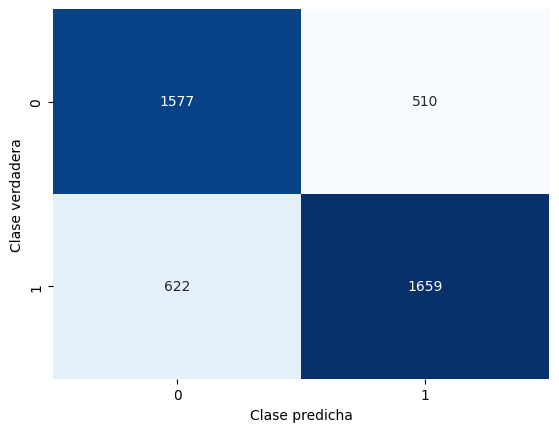

In [33]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_test.argmax(1), y_pred_bert.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()

Resultados de BERT:
[[0.17145897 0.828541  ]
 [0.5986312  0.40136877]
 [0.20156933 0.7984307 ]
 ...
 [0.8131401  0.1868599 ]
 [0.73428786 0.2657121 ]
 [0.15115903 0.84884095]]
Predicciones de BERT:
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


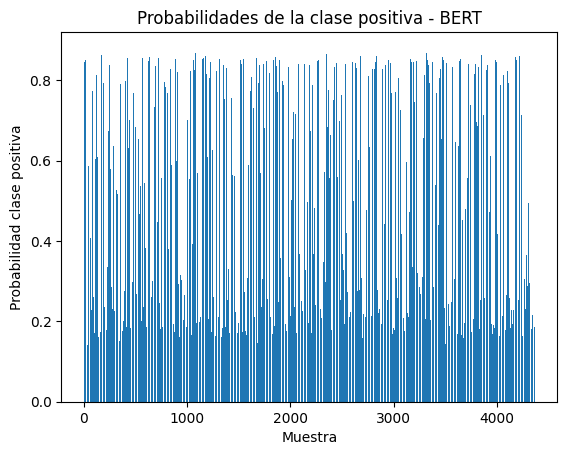

In [34]:
y_pred_bert = np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

# Imprimir result_bert
print("Resultados de BERT:")
print(result_bert)

# Imprimir y_pred_bert
print("Predicciones de BERT:")
print(y_pred_bert)

# Obtener las probabilidades de la clase positiva (etiqueta 1)
probabilities = result_bert[:, 1]

# Crear índices para las muestras
indices = np.arange(len(probabilities))

# Generar gráfico de barras
plt.bar(indices, probabilities)
plt.xlabel("Muestra")
plt.ylabel("Probabilidad clase positiva")
plt.title("Probabilidades de la clase positiva - BERT")
plt.show()

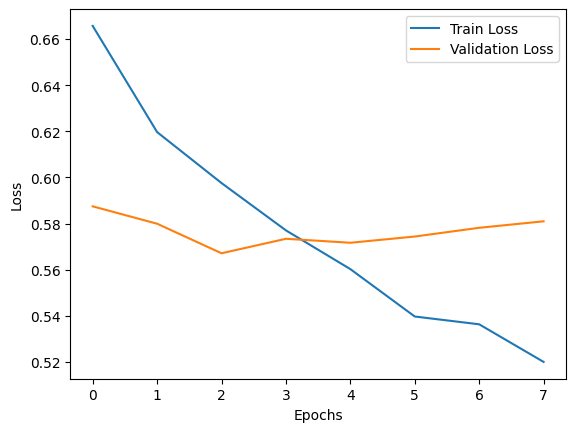

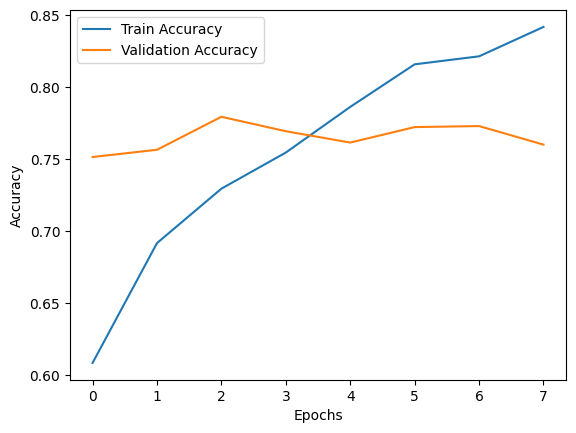

In [35]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']

# Generar gráfica de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font color="brown"><h1>**Conclusiones**</h1></font>

A la vista de los resultados, observamos que la pérdida de validación aumenta indicando overfitting. Aún habiendo utilizado dropout, el modelo no ha mejorado. La cause puede ser motivada por la falta de datos suficientes en el entrenamiento. El modelo se puede mejorar añadiendo mas datos con la técnica de data augmentation.

<font color="brown"><h1>**Bibliografia**</h1></font>